# COVID-19 Data Analysis Project

## Table of Contents
1. [The Project](#TheProject)
    1. Description of project
    2. Questions/ aim of the project 
    3. Why the project?
    
2. [A Closer Look at the Data](#Data)
    1. How to access the data?
    2. Data Contained in CSV File
3. [Code](#Code)
    1. Importing our required libraries 
    2. Importing the data 

### The Project <a id='TheProject'>

#### Description of the project

This project explores the data regarding COVID-19 through creating visualizations such as graphs and models and answering questions regarding the data.

#### Questions / aim of the project
1. Looking at Total Cases vs Total Deaths as a percentage

2.  Show what percentage of the population got COVID-19

3. What country is the highest infection rate compared to the population

4. Showing countries with highest death count per population

5. Breaking things down by continent
    5a) Showing  continents with the highest death count per population 

6. Global Numbers 
    6a) Total Deaths 
    6b) Total Vaccinations 

7. Total Population vs Vaccinations 

#### Why the project?

The purpose of this project to go over how COVID-19 impacted the population around the world and also to be able to practice with data analysis skills such as but not limited to : data cleansing, exploratory data analysis (E.D.A) and data visualization.

### A Closer Look at the Data <a id="Data">

#### How to access the data? 
The data comes from the "Our World In Data" GitHub page, link : https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv , the data only goes until 25/10/2021

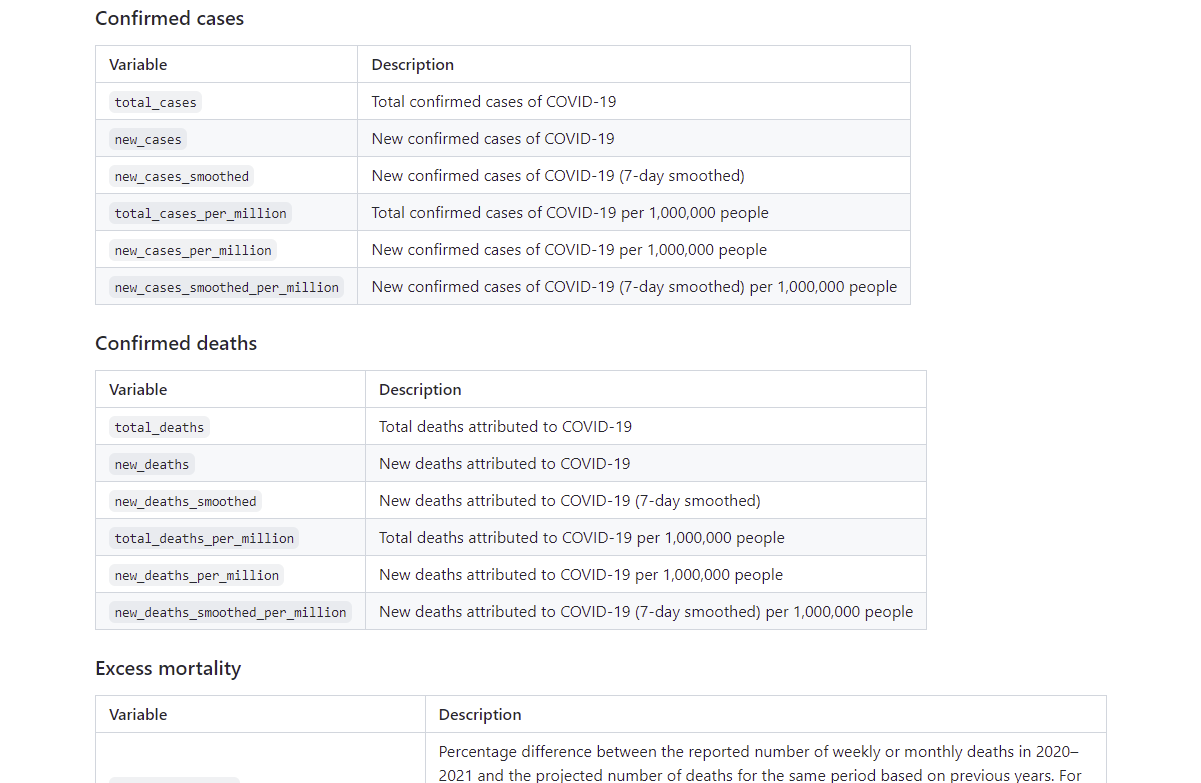 <br><br>`To learn more about the data contained in the CSV file, visit the OWID github link:` https://github.com/owid/covid-19-data/blob/master/public/data/README.md 

## Code <a id="Code">

### Importing the required libraries

In [108]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

### Importing the data

In [109]:
df = pd.read_csv('owid-covid-data.csv')

### Cleaning the data 

Upon reading the data on dataframe `df`, I've noticed that there are `nan` values. <br>
e.g: <br>
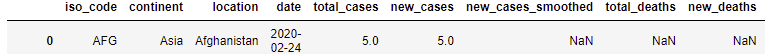
<br>
I need to remove them so that they won't affect the results of future code. 


#### Replacing the `nan` values 

In [110]:
df = df.fillna(0)

In [111]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126241,ZWE,Africa,Zimbabwe,10/21/2021,132540.0,103.0,41.286,4662.0,3.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
126242,ZWE,Africa,Zimbabwe,10/22/2021,132588.0,48.0,43.286,4663.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
126243,ZWE,Africa,Zimbabwe,10/23/2021,132588.0,0.0,36.429,4663.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0
126244,ZWE,Africa,Zimbabwe,10/24/2021,132651.0,63.0,40.429,4669.0,6.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,0.0,0.0,0.0,0.0


### Total cases VS Total Deaths
How many cases there are in "x" country and how many deaths they have for their entire cases
E.G : They had ~1000 people who have been diagnosed and had 10 people who died who had COVID-19,
what is the percentage of people who died who had COVID-19 <br>

Firstly I'll explore the percentage of deaths for cases `worldwide` <br>
Secondly I'll explore the percentage of deaths for cases of each country

##### Percentage of total deaths out of total cases worldwide 

In [112]:
EOY_DF= df[(df['date']=='12/31/2020')] 

In [113]:
cases_deaths_df = EOY_DF[['location','total_cases','total_deaths']]

In [114]:
cases_deaths_df

,location,total_cases,total_deaths
311,Afghanistan,52330.0,2189.0
932,Africa,2760450.0,65468.0
1541,Albania,58316.0,1181.0
2150,Algeria,99610.0,2756.0
2753,Andorra,8049.0,84.0
...,...,...,...
123351,Vietnam,1465.0,35.0
124211,World,83638175.0,1880468.0
124775,Yemen,2099.0,610.0
125362,Zambia,20725.0,388.0


In [53]:
world_deaths_percentage =round((int(cases_deaths_df[cases_deaths_df['location']=='World']['total_deaths'])/int(cases_deaths_df[cases_deaths_df['location']=='World']['total_cases']))*100,2)

### The percentage of people who have died of COVID-19 out of the total cases on 2020-12-31 (final day of 2020) :

In [94]:
world_deaths_percentage

2.25

### Percentage of total deaths out of total cases for each country 


In [119]:
cases_deaths_df = EOY_DF[(EOY_DF['location']!='Africa')&(EOY_DF['location']!='Asia')&(EOY_DF['location']!='Europe')&(EOY_DF['location']!='European Union')&(EOY_DF['location']!='International')&(EOY_DF['location']!='North America')&(EOY_DF['location']!='Oceania')&(EOY_DF['location']!='South America')&(EOY_DF['location']!='World')]

In [121]:
#removing data from locations that are not countries (such as continents and worldwide)
cases_deaths_df = cases_deaths_df[['location','total_deaths','population']]

In [95]:
#checking for any np.nan values 
0.0 in cases_deaths_df['total_cases'].tolist()

True

In [96]:
#print(0) if((row['total_cases']==0)|(row['total_deaths']==0)) else
location = []
deaths_percentage = []
for i, row in cases_deaths_df.iterrows():
    if((row['total_cases']==0)&(row['total_deaths']==0)): 
        deaths_percentage.append(0)
    else:
        location.append(row['location'])
        deaths_percentage.append(round((row['total_deaths']/row['total_cases'])*100,2))
    

In [97]:
deaths_percentage

[4.18,
 2.03,
 2.77,
 1.04,
 2.31,
 3.14,
 2.66,
 1.77,
 3.2,
 1.72,
 1.21,
 2.16,
 0.38,
 1.47,
 1.83,
 0.73,
 3.02,
 2.3,
 1.35,
 0.0,
 5.72,
 3.65,
 0.28,
 2.54,
 1.91,
 3.75,
 1.27,
 0.24,
 0.0,
 1.7,
 2.68,
 0.95,
 0,
 1.27,
 4.92,
 2.73,
 5.32,
 2.63,
 1.22,
 1.52,
 1.29,
 0.61,
 1.86,
 1.23,
 0.54,
 1.61,
 3.35,
 0.79,
 1.05,
 0.0,
 1.41,
 6.6,
 5.53,
 2.87,
 1.63,
 0.23,
 0.82,
 2.19,
 1.55,
 4.08,
 1.55,
 2.42,
 0.67,
 3.27,
 1.1,
 1.92,
 0.61,
 3.48,
 0.0,
 3.49,
 0.59,
 1.84,
 2.59,
 2.36,
 2.57,
 1.67,
 2.96,
 0.5,
 1.45,
 2.98,
 4.51,
 2.15,
 2.44,
 0.79,
 3.52,
 2.35,
 1.4,
 1.3,
 1.37,
 1.73,
 2.6,
 0.62,
 1.67,
 0.0,
 1.55,
 0.81,
 1.65,
 4.61,
 1.47,
 1.98,
 1.27,
 1.07,
 1.47,
 2.87,
 0.42,
 0.35,
 3.79,
 1.71,
 0.0,
 2.42,
 1.9,
 8.82,
 2.06,
 0.34,
 0.08,
 1.41,
 1.68,
 0.89,
 2.15,
 0.86,
 0.71,
 1.43,
 1.16,
 2.73,
 3.13,
 1.47,
 3.0,
 0.88,
 1.16,
 2.11,
 1.01,
 1.63,
 1.15,
 2.1,
 9.17,
 1.95,
 2.21,
 1.67,
 0.17,
 2.49,
 1.8,
 1.1,
 0.0,
 1.42,
 0.0,
 0.0,
 2.5

With the data successfully made I now want to be able to put this into a dataframe so that I can display this in a more appealing format

In [98]:
deaths_percentage_df = pd.DataFrame(list(zip(location,deaths_percentage)),columns=['location','deaths_percentage'])

In [99]:
deaths_percentage_df

,location,deaths_percentage
0,Afghanistan,4.18
1,Albania,2.03
2,Algeria,2.77
3,Andorra,1.04
4,Angola,2.31
...,...,...
185,Venezuela,0.00
186,Vietnam,0.91
187,Yemen,2.39
188,Zambia,29.06


### Show what percentage of the population got COVID-19 

In [115]:
cases_population_df = cases_deaths_df[(cases_deaths_df['location']!='Africa')&(cases_deaths_df['location']!='Asia')&(cases_deaths_df['location']!='Europe')&(cases_deaths_df['location']!='European Union')&(cases_deaths_df['location']!='International')&(cases_deaths_df['location']!='North America')&(cases_deaths_df['location']!='Oceania')&(cases_deaths_df['location']!='South America')&(cases_deaths_df['location']!='World')]